In [62]:
import time
import decimal
from decimal import Decimal as dec
import numpy as np
import random as rnd
from matplotlib.pyplot import plot

%matplotlib inline

In [33]:
MIN_INPUT_VALUE, MAX_INPUT_VALUE = 0, 65535
NUMBER_OF_MEASUREMENTS = 5
MAX_INPUT_LENGTH = 2000

In [66]:
def test_function(function, *additional_args, two_dimensions=False, inputs=1,
                  limit=MAX_INPUT_LENGTH, **additional_kwargs):
    return [average_runtime(function, i, *additional_args,
                           two_dimensions=two_dimensions,
                           inputs=inputs, **additional_kwargs)
           for i in range(1, limit+1)]

def discretize_function(function, start=1, end=2000):
    return [function(x) for x in range(start, end+1)]

def average_runtime(function, input_length, *additional_args,
                   two_dimensions=False, inputs=1, **additional_kwargs):
    measurements = [test_with_random_input(function, 
                                           input_length,
                                           *additional_args,
                                           two_dimensions=two_dimensions, 
                                           inputs=inputs,  **additional_kwargs)
                    for x in range(NUMBER_OF_MEASUREMENTS)]
    return sum(measurements)/len(measurements)

def test_with_random_input(function, input_length, *additional_args, 
                           two_dimensions=False, inputs=1, **additional_kwargs):
    random_element = rnd.sample(range(MIN_INPUT_VALUE,MAX_INPUT_VALUE),input_length)
    
    if two_dimensions:
        random_element = [random_element for x in random_element]
    
    random_input = [random_element for x in range(inputs)]
    start_time = time.time()
    function(*random_input, *additional_args, **additional_kwargs)
    end_time = time.time()
    
    return end_time - start_time

In [34]:
"""Some custom functions for measurement"""
const_func = lambda x: 0

def simple_polynomial(input_list, argument):
    decimal.getcontext().prec = 100
    result = 0
    for i, el in enumerate(input_list):
        result += dec(input_list[i]) * dec(argument) ** i
    return result

def horners_polynomial(input_list, argument):
    result = 0
    for el in input_list[:0:-1]:
        result = (result + el) * argument
    return result + input_list[0]

def bubble_sort(input_list):
    n = len(input_list)
    for i in range(n):
        for j in range(0, n-i-1):
            if input_list[j] > input_list[j+1] :
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j]
    return input_list

def dot_product(left_matrix, right_matrix):
    rows = len(left_matrix)
    
    result = [[0 for x in range(rows)] for y in range(rows)]  

    for i in range(rows): 
        for j in range(rows): 
            for k in range(rows): 
                result[i][j] += left_matrix[i][k] * right_matrix[k][j]
    
    return result

In [70]:
const_complexity = discretize_function(lambda x: 0)
linear_complexity = discretize_function(lambda x: x)
quadratic_complexity = discretize_function(lambda x: x * x)
cubic_complexity = discretize_function(lambda x: x * x * x, end=300)
nlogn_complexity = discretize_function(lambda x: x * np.log(x))

## Const function
### real run time

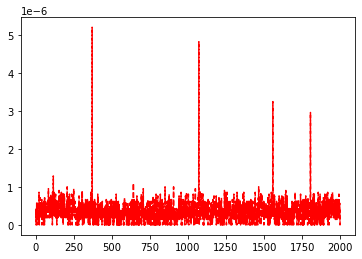

In [20]:
const_func_run_data = test_function(const_func)
plot(const_func_run_data, 'r--')

### expected time

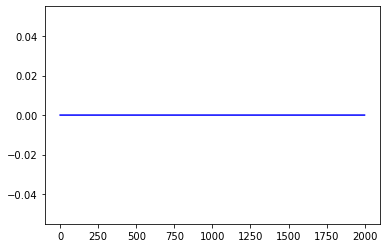

In [19]:
plot(const_complexity, 'b-')

## Sum function
### real run time

In [22]:
sum_func_run_data = test_function(sum)

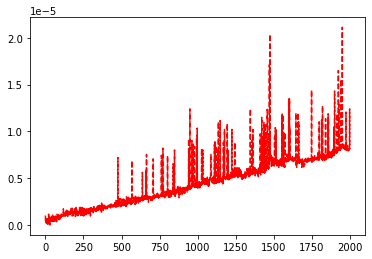

In [23]:
plot(sum_func_run_data, 'r--')

### expected time

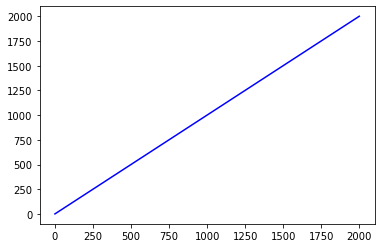

In [24]:
plot(linear_complexity, 'b-')

## Product function
### real run time

In [25]:
prod_func_run_data = test_function(np.prod)

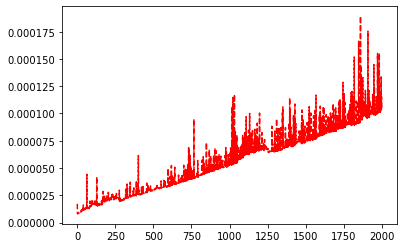

In [26]:
plot(prod_func_run_data, 'r--')

### expected time

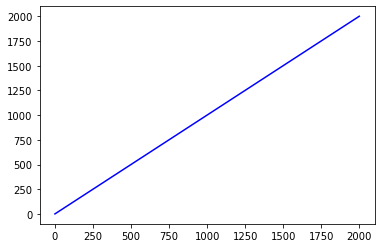

In [27]:
plot(linear_complexity, 'b-')

## Classical polynomial
### real run time

In [41]:
simple_polynomial_run_data = test_function(simple_polynomial, 1.5)

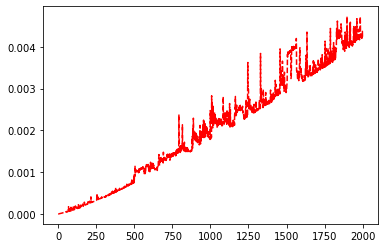

In [42]:
plot(simple_polynomial_run_data, 'r--')

### expected time

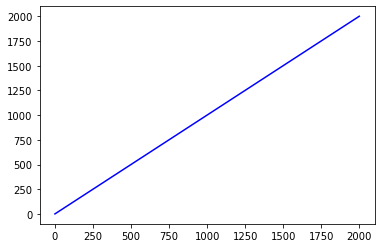

In [37]:
plot(linear_complexity, 'b-')

## Horners polynomial

### real run time

In [40]:
horners_polynomial_run_data = test_function(horners_polynomial, 1.5)

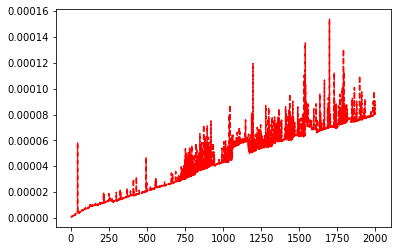

In [43]:
plot(horners_polynomial_run_data, 'r--')

### expected time

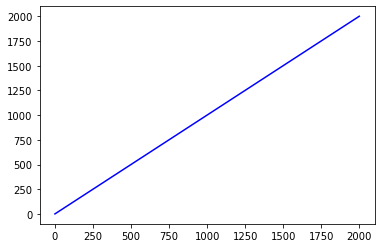

In [44]:
plot(linear_complexity, 'b-')

## Bubble sort
### real run time

In [91]:
bubble_sort_run_data = test_function(bubble_sort, limit=1000)

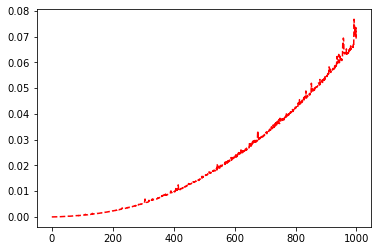

In [92]:
plot(bubble_sort_run_data, 'r--')

### expected time

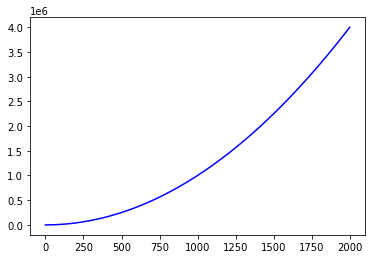

In [50]:
plot(quadratic_complexitydratic_complexity, 'b-')

## Quick sort
### real run time

In [67]:
quick_sort_run_data = test_function(np.sort, kind='quicksort')

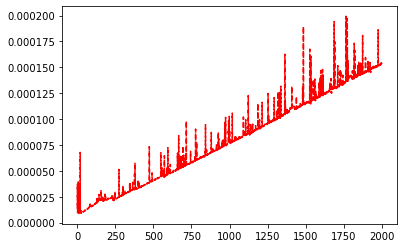

In [68]:
plot(quick_sort_run_data, 'r--')

### expected time
expected value lies between the lines

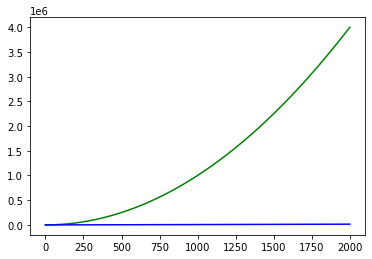

In [71]:
plot(quadratic_complexity, 'g-', nlogn_complexity, 'b-')

## Timsort
### real run time

In [77]:
tim_sort_run_data = test_function(np.sort, kind='stable')

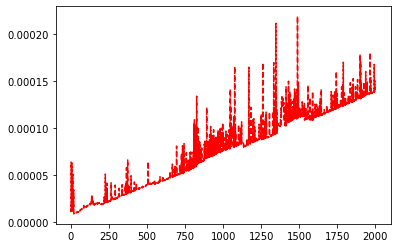

In [78]:
plot(tim_sort_run_data, 'r--')

### expected time

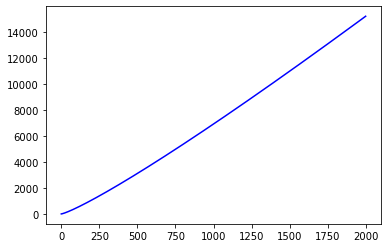

In [83]:
plot(nlogn_complexity, 'b-')

## Dot product
### real run time

In [88]:
dot_product_run_data = test_function(dot_product, two_dimensions=True, inputs=2, limit=200)

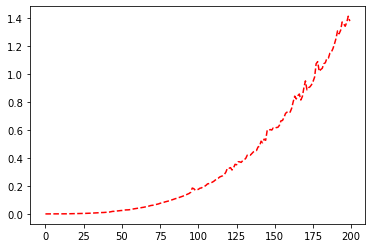

In [89]:
plot(dot_product_run_data, 'r--')

### expected run time

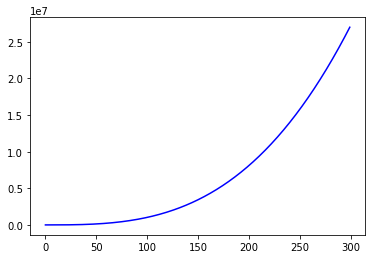

In [90]:
plot(cubic_complexity, 'b-')